In [1]:
import re
from pathlib import Path

folder_path = "TSSONGS/"

sample_size = 0

file = open("tsttr-overall.csv", mode="w", encoding="utf-8")

file.write('"Text","Types","Tokens","TTR"\n')
#create columns

for file_path in sorted(Path(folder_path).glob('*.txt')):
    
    text = open(file_path, encoding='utf-8').read()
    
    text = re.sub("[^a-zA-Z0-9]", " ", text)
    
    text_words = text.split()

    tokens = len(text_words)
    
    if sample_size == 0 or tokens < sample_size:
        sample_size = tokens
    
    unique_words = []
    
    for word in text_words:
        word = word.lower()

        if word not in unique_words:
            unique_words.append(word)
            
    types = len(unique_words)
    
    ttr = (types / tokens) * 100

    file.write(f'"{file_path.stem}",{types},{tokens},{ttr}\n')
file.close()


file = open("ttr-standardized.csv", mode="w", encoding="utf-8")
file.write('"Text","Types","Tokens","TTR"\n')
for file_path in sorted(Path(folder_path).glob('*.txt')):
    text = open(file_path, encoding='utf-8').read()
    text = re.sub("[^a-zA-Z0-9]", " ", text)


    text_words = text.split()

    text_words_standardized = text_words[:sample_size] 

    tokens_standardized = len(text_words_standardized)

    unique_words_standardized = []
    
    for word in text_words_standardized:
        word = word.lower()
        if word not in unique_words_standardized:
            unique_words_standardized.append(word)
            
            
    types_standardized = len(unique_words_standardized)
    
    ttr_standardized = (types_standardized / tokens_standardized) * 100
    
    file.write(f'"{file_path.stem}",{types_standardized},{tokens_standardized},{ttr_standardized}\n')

file.close()

In [2]:
#TSONGS['TTR'].value_counts()

In [4]:
import pandas as pd    
TSONGSnonstandard = pd.read_csv('tsttr-overall.csv')   
TSONGSnonstandard.sort_values(by='TTR') 

,Text,Types,Tokens,TTR
5,nineteeneightynine,675,6134,11.004239
7,reputation,904,7318,12.353102
6,red,814,5848,13.919289
8,speak_now,987,7063,13.974232
3,lover,1008,7203,13.994169
9,taylor_swift,624,4248,14.689266
4,midnights,1138,7586,15.001318
1,fearless,728,4850,15.010309
0,evermore,1001,5517,18.143919
2,folklore,999,5034,19.845054


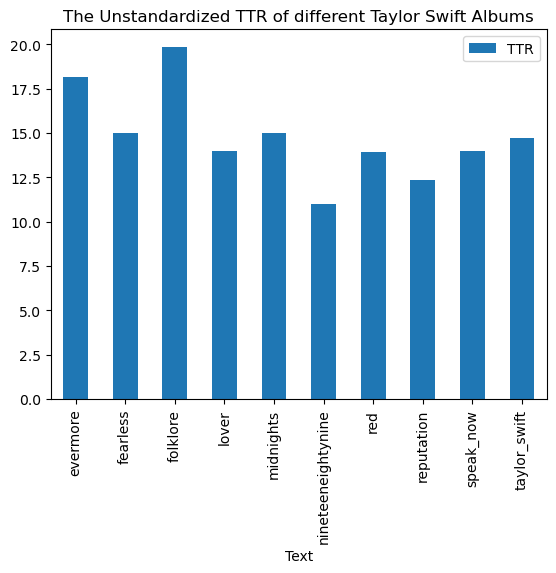

In [6]:
TSONGS.bar = TSONGSnonstandard.plot(x = 0, y = 3, kind = 'bar', title = 'The Unstandardized TTR of different Taylor Swift Albums')

In [8]:
import pandas as pd    
TSONGS = pd.read_csv('ttr-standardized.csv')   
TSONGS.sort_values(by='TTR') 

,Text,Types,Tokens,TTR
5,nineteeneightynine,507,4248,11.935028
7,reputation,595,4248,14.006591
9,taylor_swift,624,4248,14.689266
1,fearless,651,4248,15.324859
6,red,665,4248,15.654426
3,lover,736,4248,17.325800
8,speak_now,747,4248,17.584746
4,midnights,772,4248,18.173258
0,evermore,861,4248,20.268362
2,folklore,890,4248,20.951036


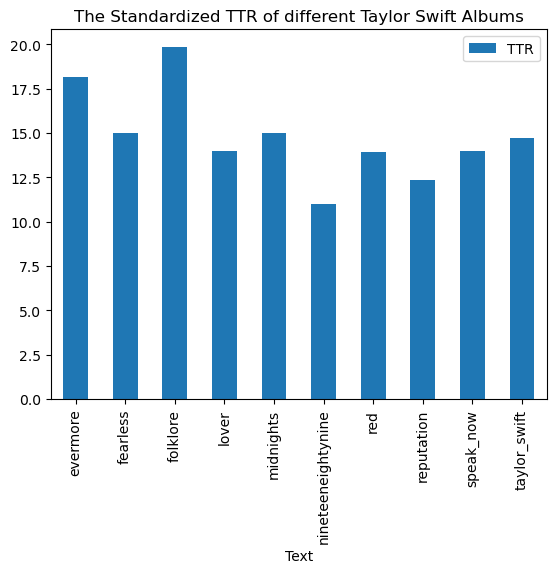

In [7]:
# TSONGS['Types'].value_counts()[:10].plot(kind="bar")
#TSONGS[['Text', 'TTR']].plot(kind="bar")
# x = column choice, y = other col 
TSONGS.bar = TSONGS.plot(x = 0, y = 3, kind = 'bar', title = 'The Standardized TTR of different Taylor Swift Albums')